### Details

This document contains the details of Task 2 for ICS2205. The task will be marked out of 100%, however it is equivalent to 10% of the total mark for this unit. <br> 
While discussions between individual students are considered as healthy, the final deliverable needs to be that produced by you and **not plagiarised** in any way. The **deadline** to submit this task is **12:00pm Monday 28th November 2022**.<br>
You need to compile your answer to the task described below in this same notebook. Then upload it, together with a duely filled plagiarism form, onto the appropriate space on the VLE. Deliverables submitted late will be penalised or may not be accepted.

### Interfacing NetworkX with Neo4j

Neo4j is an important graph platform and is more than a persistant storage for graph data. It provides graph algorithms that are scaleable and production-ready. In this task you will need to combine Neo4j with NetworkX. To do this you need to use the **nxneo4j** Python library.


Install the latest version of nxneo4j as follows:

In [1]:
! pip install git+https://github.com/ybaktir/networkx-neo4j

  Cloning https://github.com/ybaktir/networkx-neo4j to c:\users\user\appdata\local\temp\pip-req-build-0wla4xng


  Running command git clone -q https://github.com/ybaktir/networkx-neo4j 'C:\Users\User\AppData\Local\Temp\pip-req-build-0wla4xng'


In [2]:
! pip install networkx-neo4j

#### Connect to Neo4j

In [3]:
from neo4j import GraphDatabase, basic_auth

For this task you can use a [Neo4j blank sandbox](https://neo4j.com/sandbox/). Once the instance has started check the connection details tab to find the **Bolt URL** and the **password**. By default the user name is **neo4j**. Update the code below with the details to connect to Neo4j sandbox. You can also use the Neo4j desktop version.

In [4]:
user='neo4j'
url='bolt://localhost:7687'
password='test'
graph = GraphDatabase.driver(url,auth=basic_auth(user,password))

#For this task Neo4j version 4.3.7 was used

Access the Neo4j sandbox and inspect the database by openning it with the browser

In [5]:
import nxneo4j as nx #using nxneo4j

In [6]:
G = nx.Graph(graph) #create the empty graph

#### Analyse the Game of Thrones dataset

nxneo4j contains a number of built-in datasets. One of these datasets is build around the popular TV series of Game of Thrones. The dataset is based around that created by [Andrew Beveridge](https://networkofthrones.wordpress.com/) and contains the interactions between the characters of the popular TV series. The nodes are labelled "Character" while the relationships include "INTERACTS1", "INTERACTS2", "INTERACTS3" and "INTERACTS45" which represent the interactions between the characters across the various books (1 to 5).

Load the dataset and draw the graph using nxneo4j **(5 marks)**

In [7]:
#Deleting uneccessary data and loading dataset
G.delete_all()
G.load_got()

#Graph configuration
G.identifier_property = 'name'
G.relationship_type = '*'
G.node_label = 'Character'

In [8]:
#Drawing graph
nx.draw(G)

Find how many nodes the graph contains **(5 marks)**

In [9]:
#Finding how many nodes the graph has
len(G) 
#796 nodes

796

Compute PageRank, sort the results and print out the first 5 results **(20 marks)**

In [10]:
#Computing pagerank
PR = nx.pagerank(G)
#Sorting the results and printing out first 5 results
sortedPR = sorted(PR.items(), key=lambda x: x[1], reverse=True)
for character, score in sortedPR[:5]:
    print(character, score)

Jon-Snow 17.596878939369677
Tyrion-Lannister 17.56810234895046
Jaime-Lannister 13.92547230647357
Cersei-Lannister 13.402357010904186
Daenerys-Targaryen 12.499194895817286


Compute Betweenness Centrality. Sort the results and print out the first 5 results. **(20 marks)**

In [11]:
#Computing Betweeness Centrality
BW = nx.betweenness_centrality(G)
#Sorting the results and printing out first 5 results
sortedBW = sorted(BW.items(), key=lambda x: x[1], reverse=True)
for character, score in sortedBW[:5]:
    print(character, score)

Jon-Snow 65395.26787165436
Tyrion-Lannister 50202.17398521848
Daenerys-Targaryen 39636.77718662113
Stannis-Baratheon 35984.211828633146
Theon-Greyjoy 35436.85268519103


Now switch to the Neo4j sandbox (or your desktop version) and access the database through the browser. Query directly the database using Cypher to find out the following:

1. Count the number of edges. **(10 marks)**
2. Display the graph based on the relationships of the character with the highest PageRank (from above). **(20 marks)**
3. Degree centrality is simply the number of connections that a node has in the network. In this context the degree centrality of a character is simply the number of other characters that interacted with it. Compute the degree centrality by considering **only** the **INTERACTIONS2** relation. **(20 marks)**

# Add the Cypher queries below:

### Cypher query (1)

<u>Counting number of edges and returning count:</u><br/><br/>
**MATCH p=()-[r]->() RETURN count(r)**
<br/><br/>

<u>Result can be seen below:</u><br/><br/>

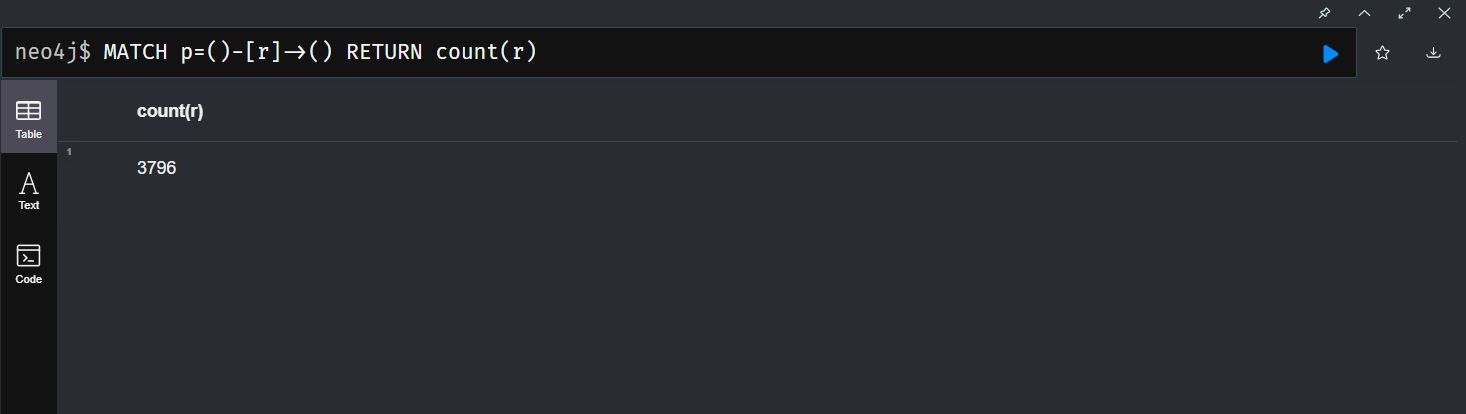

### Cypher query (2)

<u>Creating Graph 'gotGraph' with the node projection set to 'Character'<br/>
    and relationship projection equal to all the INTERACTS relationships between characters:</u><br/><br/>
**CALL gds.graph.create('gotGraph', 'Character', ["INTERACTS1", "INTERACTS2", "INTERACTS3", "INTERACTS45"])**

<br/><u>Displaying graph based on the relationships of the character with highest Page Rank.<br/> This was achieved by working out the page rank of the 'gotGraph' and returning the nodeId, as well as score. <br/>The name and score attributes pertaining to the nodeId are retrieved, and the node with the highest score is stored in the maxData variable.<br/> Furthermore, said variable is used to return a graph consisting of all outgoing relations of maxData. As can be seen below:</u><br/><br/>
**CALL gds.pageRank.stream('gotGraph') <br/>
YIELD nodeId, score <br/>
WITH gds.util.asNode(nodeId).name AS name, score <br/>
WITH apoc.agg.maxItems(name, score) as maxData <br/>
MATCH p = (graphJon:Character {name: maxData.items[0]})<--(r) <br/>
RETURN p**
<br/><br/>

<u>Note that the result obtained from the Neo4j desktop (Tyrion-Lannister) and the result from above (Jon-Snow) did not match, as is the case that one was a directed a graph and the other an undirected graph. <br/>Result can be seen below:</u><br/><br/>

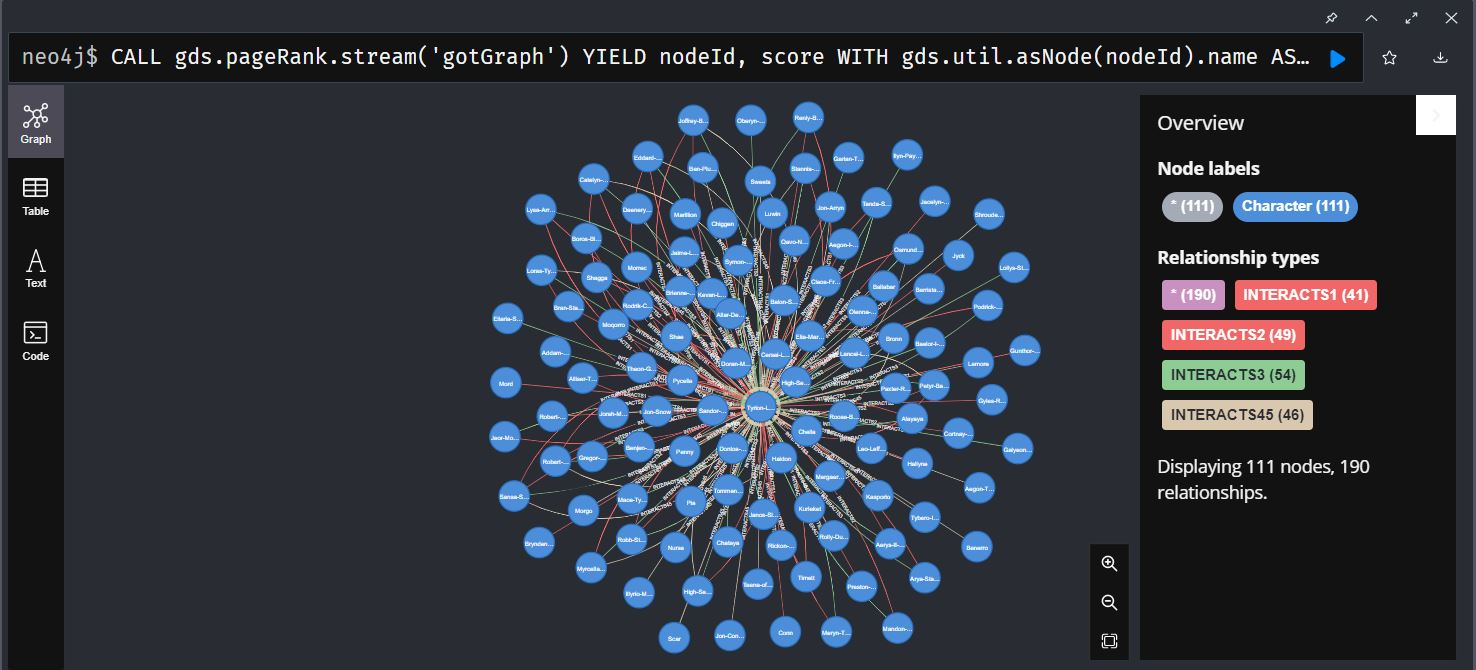

### Cypher query (3)

<u>Creating Graph 'gotGraph2' with the node projection set to 'Character'<br/>
    and relationship projection equal to INTERACTS2 relationship between characters:</u><br/><br/>
**CALL gds.graph.create('gotGraph2', 'Character',  "INTERACTS2")**

<br/><u>Computing Degree Centrality. <br/> This was achieved by working out the degree centrality of the 'gotGraph2' and returning the nodeId, as well as score. <br/> Furthermore, said attributes are returned and are ordered by descending order of the score. As can be seen below:</u><br/><br/>
**CALL gds.degree.stream('gotGraph2') YIELD nodeId, score <br/>
RETURN gds.util.asNode(nodeId).name AS name, score <br/>
ORDER BY score DESC**
<br/><br/>

<u>Result can be seen below:</u><br/><br/>

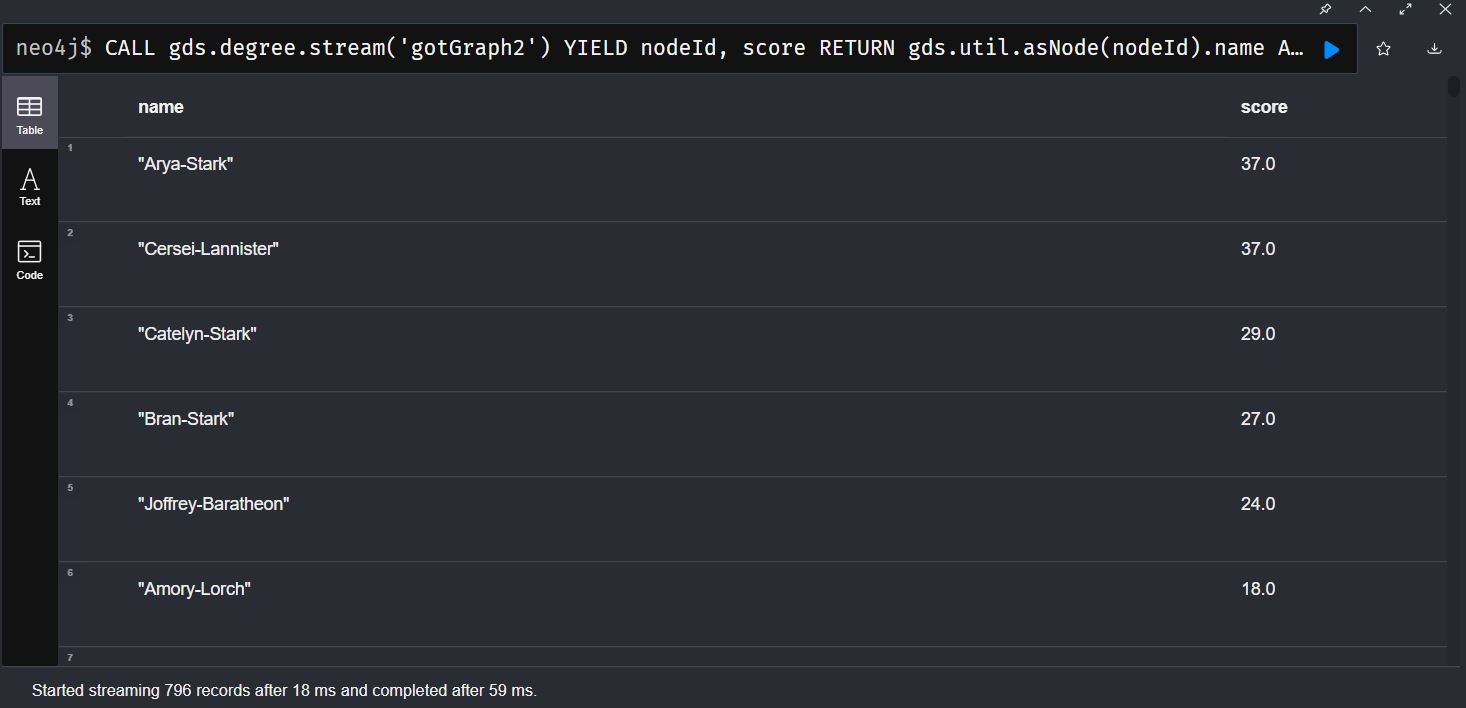

#### References

1. Further information to how to use Neo4j from Python: https://neo4j.com/developer/python/